# Bundestag Stammdaten ML 
TODO: Erklärung wo der Datensatz her kommt
TODO: Zielsetzung

In [1]:
# space for imports
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

<hr>

## 1) Load data
### CSV
Even though the Bundestag publish an XML-File or offers a working REST-API, these data structures need heavy preparation before they can be used in a pandas dataframe. 

In [2]:
mdb_csv = pd.read_csv('D:/Dev/python/bundestag-member-ML/data/mdb_data.csv',sep=";", encoding="latin-1")
mdb_csv = mdb_csv.drop(columns=['Unnamed: 0'], axis=1)

<hr>

## 2) First overview of the data and the data structure

### 2.1) Data structure

In [3]:
mdb_csv.head()

,title,first_name,last_name,full_name,gender,date_birth,place_birth,country_birth,date_death,religion,family_stat,occupation,party,time,legislature,elect_distr,faction,mandate_type
0,Dr.,Manfred,Abelein,Dr. Manfred Abelein,männlich,20.10.1930,Stuttgart,NaN,17.01.2008,katholisch,keine Angaben,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",CDU,1,5,174.0,Fraktion der Christlich Demokratischen Union/C...,Direktwahl
1,Dr.,Ernst,Achenbach,Dr. Ernst Achenbach,männlich,09.04.1909,Siegen,NaN,02.12.1991,evangelisch,"verheiratet, 3 Kinder",Rechtsanwalt und Notar,FDP,1,3,NaN,Fraktion der Freien Demokratischen Partei,Landesliste
2,NaN,Annemarie,Ackermann,Annemarie Ackermann,weiblich,26.05.1913,Parabutsch,Jugoslawien,18.02.1994,katholisch,"verheiratet, 5 Kinder",Hilfsreferentin,CDU,1,2,NaN,Fraktion der Christlich Demokratischen Union/C...,Landesliste
3,Dr.,Else,Ackermann,Dr. Else Ackermann,weiblich,06.11.1933,Berlin,NaN,14.09.2019,evangelisch,ledig,Ärztin,CDU,1,11,NaN,Fraktion der Christlich Demokratischen Union/C...,Volkskammer
4,NaN,Ulrich,Adam,Ulrich Adam,männlich,09.06.1950,"Teterow, Kr. Teterow, Bezirk Neubrandenburg",NaN,NaN,evangelisch,"verheiratet, 2 Kinder","Mathematiker, Geschäftsführer",CDU,1,12,268.0,Fraktion der Christlich Demokratischen Union/C...,Direktwahl


In [4]:
mdb_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11618 entries, 0 to 11617
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          3061 non-null   object 
 1   first_name     11618 non-null  object 
 2   last_name      11618 non-null  object 
 3   full_name      11618 non-null  object 
 4   gender         11618 non-null  object 
 5   date_birth     11618 non-null  object 
 6   place_birth    11614 non-null  object 
 7   country_birth  213 non-null    object 
 8   date_death     5411 non-null   object 
 9   religion       11192 non-null  object 
 10  family_stat    11463 non-null  object 
 11  occupation     11618 non-null  object 
 12  party          11613 non-null  object 
 13  time           11618 non-null  int64  
 14  legislature    11618 non-null  int64  
 15  elect_distr    5970 non-null   float64
 16  faction        11618 non-null  object 
 17  mandate_type   11617 non-null  object 
dtypes: flo

There are multiple columns with null values. <br>
This includes with a missing value from `party` also one of the two y-values.

Values in columns like `place_birth`, `party` and `mandate_type`, where just a couple are missing, could be filled by researching the parliament member.

In [5]:
mdb_csv.describe()

,time,legislature,elect_distr
count,11618.000000,11618.000000,5970.000000
mean,2.571355,10.507058,134.130151
std,1.707634,5.433358,86.298410
min,1.000000,1.000000,1.000000
25%,1.000000,6.000000,56.000000
50%,2.000000,11.000000,130.000000
75%,3.000000,15.000000,204.000000
max,13.000000,19.000000,328.000000


In [6]:
mdb_csv.tail()

,title,first_name,last_name,full_name,gender,date_birth,place_birth,country_birth,date_death,religion,family_stat,occupation,party,time,legislature,elect_distr,faction,mandate_type
11613,Dr.,Heinz,Riesenhuber,Dr. Heinz Riesenhuber,männlich,01.12.1935,Frankfurt/Main,NaN,NaN,katholisch,"verheiratet, 4 Kinder","Dipl.-Chemiker, Bundesminister a. D.",CDU,11,18,181.0,Fraktion der Christlich Demokratischen Union/C...,Direktwahl
11614,Dr.,Wolfgang,Schäuble,Dr. Wolfgang Schäuble,männlich,18.09.1942,Freiburg,NaN,NaN,evangelisch,"verheiratet, 4 Kinder","Bundestagspräsident, Bundesminister a. D., Jurist",CDU,11,17,284.0,Fraktion der Christlich Demokratischen Union/C...,Direktwahl
11615,NaN,Richard,Stücklen,Richard Stücklen,männlich,20.08.1916,Heideck,NaN,02.05.2002,katholisch,verheiratet,"Präsident DBT a. D., Vizepräsident DBT a. D., ...",CSU,11,11,232.0,Fraktion der Christlich Demokratischen Union/C...,Direktwahl
11616,Dr.,Wolfgang,Schäuble,Dr. Wolfgang Schäuble,männlich,18.09.1942,Freiburg,NaN,NaN,evangelisch,"verheiratet, 4 Kinder","Bundestagspräsident, Bundesminister a. D., Jurist",CDU,12,18,284.0,Fraktion der Christlich Demokratischen Union/C...,Direktwahl
11617,Dr.,Wolfgang,Schäuble,Dr. Wolfgang Schäuble,männlich,18.09.1942,Freiburg,NaN,NaN,evangelisch,"verheiratet, 4 Kinder","Bundestagspräsident, Bundesminister a. D., Jurist",CDU,13,19,284.0,Präsidium,Direktwahl


### 2.2) Categorical values

In [7]:
mdb_csv['gender'].value_counts()

gender
männlich    9376
weiblich    2242
Name: count, dtype: int64

<Axes: xlabel='gender'>

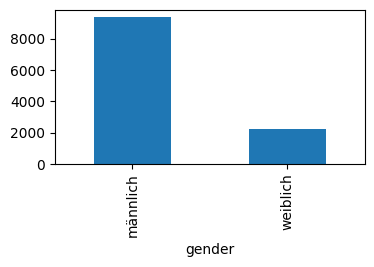

In [8]:
mdb_csv['gender'].value_counts().plot(kind='bar', figsize=(4,2))

In [9]:
mdb_csv['title'].value_counts()

title
Dr.                 2869
Prof. Dr.             96
Dr. h. c.             49
Prof.                 26
Dr. - Ing.            13
Prof. Dr. - Ing.       7
Dr. Dr. h. c.          1
Name: count, dtype: int64

<Axes: xlabel='title'>

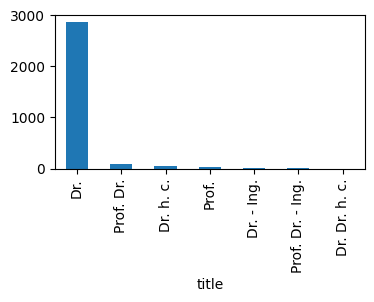

In [10]:
mdb_csv['title'].value_counts().plot(kind='bar', figsize=(4,2))

TODO: what is the difference between Dr, Dr. h. c. and Dr. Ing.

#### Missing values in place_birth, party and mandate_type

In [11]:
print("Amount of unique birth places:", len(mdb_csv['place_birth'].unique()))

Amount of unique birth places: 2180


In [12]:
mdb_csv['place_birth'].value_counts()

place_birth
Berlin                            486
Hamburg                           269
München                           230
Stuttgart                         134
Essen                             123
                                 ... 
Schwarzenbach                       1
Weilmünster                         1
Merseburg                           1
Lichtenstein / Bezirk Chemnitz      1
Mühldorf a. Inn                     1
Name: count, Length: 2179, dtype: int64

In [13]:
mdb_csv[mdb_csv['place_birth'].isnull()]

,title,first_name,last_name,full_name,gender,date_birth,place_birth,country_birth,date_death,religion,family_stat,occupation,party,time,legislature,elect_distr,faction,mandate_type
3357,NaN,Patrick,Kurth,Patrick Kurth,männlich,06.10.1976,NaN,NaN,NaN,ohne Angaben,2 Kinder,Politikwissenschaftler M. A.,FDP,1,16,NaN,Fraktion der Freien Demokratischen Partei,Landesliste
3564,NaN,Annette,Sawade,Annette Sawade,weiblich,23.04.1953,NaN,NaN,NaN,evangelisch,"verheiratet, 3 Kinder",Diplom-Chemikerin,SPD,1,17,NaN,Fraktion der Sozialdemokratischen Partei Deuts...,Landesliste
6500,NaN,Patrick,Kurth,Patrick Kurth,männlich,06.10.1976,NaN,NaN,NaN,ohne Angaben,2 Kinder,Politikwissenschaftler M. A.,FDP,2,17,NaN,Fraktion der Freien Demokratischen Partei,Landesliste
6650,NaN,Annette,Sawade,Annette Sawade,weiblich,23.04.1953,NaN,NaN,NaN,evangelisch,"verheiratet, 3 Kinder",Diplom-Chemikerin,SPD,2,18,NaN,Fraktion der Sozialdemokratischen Partei Deuts...,Landesliste


There are only four values in the data set without any birth place. <br>
After a quick google search this value can be filled with `Sondershausen` in Patrick Kurth's case and with `Nordhausen` in Annette Sawade's case.

In [14]:
mdb_csv[mdb_csv['place_birth'] == 'ohne Angaben']

,title,first_name,last_name,full_name,gender,date_birth,place_birth,country_birth,date_death,religion,family_stat,occupation,party,time,legislature,elect_distr,faction,mandate_type
128,NaN,Roland,Becker,Roland Becker,männlich,25.08.1940,ohne Angaben,NaN,NaN,ohne Angaben,keine Angaben,"Ingenieur, Referatsleiter Kommunalwesen, Bezir...",CDU,1,11,NaN,Fraktion der Christlich Demokratischen Union/C...,Volkskammer
225,NaN,Frank,Bogisch,Frank Bogisch,männlich,05.05.1956,ohne Angaben,NaN,NaN,ohne Angaben,keine Angaben,"Mitglied der Volkskammer, Ingenieur",SPD,1,11,NaN,Fraktion der Sozialdemokratischen Partei Deuts...,Volkskammer
632,NaN,Joachim,Gauck,Joachim Gauck,männlich,24.01.1940,ohne Angaben,NaN,NaN,ohne Angaben,keine Angaben,Pfarrer,DIE GRÜNEN/BÜNDNIS 90,1,11,NaN,Fraktion Die Grünen/Bündnis 90,Volkskammer
748,NaN,Martin,Gutzeit,Martin Gutzeit,männlich,30.04.1952,ohne Angaben,NaN,NaN,ohne Angaben,keine Angaben,"Mitglied der Volkskammer, Pfarrer",SPD,1,11,NaN,Fraktion der Sozialdemokratischen Partei Deuts...,Volkskammer
811,NaN,Jürgen,Haschke,Jürgen Haschke,männlich,02.07.1942,ohne Angaben,NaN,NaN,ohne Angaben,keine Angaben,"Mitglied der Volkskammer, Diplomfachlehrer",CDU,1,11,NaN,Fraktion der CDU/CSU (Gast),Volkskammer
855,Dr.,Frank,Heltzig,Dr. Frank Heltzig,männlich,10.11.1939,ohne Angaben,NaN,NaN,ohne Angaben,"verheiratet, 2 Kinder","Mitglied der Volkskammer, Physiker",SPD,1,11,NaN,Fraktion der Sozialdemokratischen Partei Deuts...,Volkskammer
1079,Dr.,Norbert,Kertscher,Dr. Norbert Kertscher,männlich,21.01.1954,ohne Angaben,NaN,NaN,ohne Angaben,keine Angaben,"Mitglied der Volkskammer, Dipl.-Gesellschaftsw...",PDS,1,11,NaN,Gruppe der Partei des Demokratischen Sozialismus,Volkskammer
1269,NaN,Sabine,Landgraf,Sabine Landgraf,weiblich,04.04.1954,ohne Angaben,NaN,NaN,ohne Angaben,keine Angaben,Milchindustrielaborantin,DSU,1,11,NaN,Fraktion der CDU/CSU (Gast),Volkskammer
1520,Dr.,Marion,Morgenstern,Dr. Marion Morgenstern,weiblich,12.09.1952,ohne Angaben,NaN,NaN,ohne Angaben,keine Angaben,"Mitglied der Volkskammer, Diplomlehrerin",PDS,1,11,NaN,Gruppe der Partei des Demokratischen Sozialismus,Volkskammer
1540,Dr.,Joachim,Müller,Dr. Joachim Müller,männlich,07.01.1947,ohne Angaben,NaN,NaN,ohne Angaben,keine Angaben,Hochschulassistent für Betriebswirtschaftslehr...,GRÜNE,1,10,NaN,Fraktion Die Grünen,Landesliste


Additionally, 16 values have a non-descriptive value as their `place_birth`.
Like the missing values these also can be filled with an online search.
- Roland Becker: `Leipzig`
- Frank Bogisch: `Wittenberge`
- Joachim Gauck: `Rostock`
- Martin Gutzeit: `Cottbus`
- Jürgen Haschke: `Gera`
- Dr. Frank Heltzig: `Dresden`
- Dr. Norbert Kertscher: `Saalfeld`
- Sabine Landgraf: `Meißen`
- Dr. Marion Morgenstern: `Köthen`
- Dr. Joachim Müller: `Hamburg`
- Herbert Rusche: `Bad Neuenahr`
- Dr. Joachim Schmiele: `Schwarzheide`
- Christian Friedrich Schultze: `Gersdorf`
- Oswald Metzger: `Grabs`, Schweiz

The birthplace of Sabine Uecker is online not available. The earliest place in her CV is that she attended the higher education in Burg. <br>
Since she was probably growing up in this area, this value is used instead.

In [15]:
mdb_csv['party'].value_counts()

party
SPD                      4247
CDU                      4150
FDP                      1035
CSU                       997
BÜNDNIS 90/DIE GRÜNEN     451
DIE LINKE.                296
AfD                        91
PDS                        77
GRÜNE                      51
DP                         37
Plos                       34
DIE GRÜNEN/BÜNDNIS 90      32
FU                         21
GB/ BHE                    20
KPD                        18
PDS/LL                     15
WAV                        14
DZP                         5
BP                          5
DSU                         5
CSUS                        4
DRP                         3
DPS                         2
DPB                         1
CVP                         1
SRP                         1
Name: count, dtype: int64

<Axes: xlabel='party'>

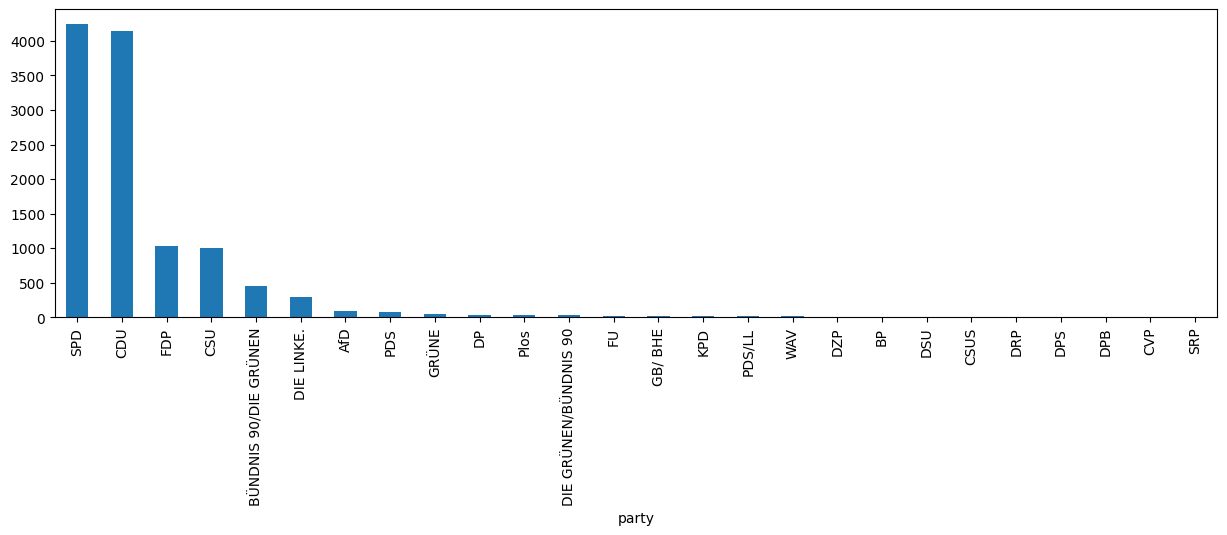

In [16]:
mdb_csv['party'].value_counts().plot(kind='bar', figsize=(15,4))

In [17]:
mdb_csv[mdb_csv['party'].isnull()]

,title,first_name,last_name,full_name,gender,date_birth,place_birth,country_birth,date_death,religion,family_stat,occupation,party,time,legislature,elect_distr,faction,mandate_type
574,NaN,Alfred,Frenzel,Alfred Frenzel,männlich,18.09.1899,Josefsthal,NaN,23.07.1968,ohne Angaben,keine Angaben,Glasschmelzer,NaN,1,2,NaN,Fraktion der Sozialdemokratischen Partei Deuts...,Landesliste
1322,Dr.,Heinrich,Leuchtgens,Dr. Heinrich Leuchtgens,männlich,31.10.1876,Birklar,NaN,21.03.1959,ohne Angaben,keine Angaben,"Lehrer, Volkswirt",NaN,1,1,NaN,Fraktion der Freien Demokratischen Partei,Landesliste
2054,Dr.,Helmuth,Schranz,Dr. Helmuth Schranz,männlich,07.01.1897,Haiger,NaN,07.05.1968,ohne Angaben,"verheiratet, 4 Kinder",Prokurist,NaN,1,2,NaN,Fraktion Deutsche Partei,Landesliste
4481,NaN,Alfred,Frenzel,Alfred Frenzel,männlich,18.09.1899,Josefsthal,NaN,23.07.1968,ohne Angaben,keine Angaben,Glasschmelzer,NaN,2,3,NaN,Fraktion der Sozialdemokratischen Partei Deuts...,Landesliste
5510,Dr.,Helmuth,Schranz,Dr. Helmuth Schranz,männlich,07.01.1897,Haiger,NaN,07.05.1968,ohne Angaben,"verheiratet, 4 Kinder",Prokurist,NaN,2,3,NaN,Fraktion Deutsche Partei,Landesliste


According to Wikipedia Alfred Frenzel was a member of the SPD, Dr. Heinrich Leuchtgens was a member of his own party the NDP and Dr. Helmuth Schranz was a member of the DP.

In [18]:
mdb_csv['mandate_type'].value_counts()

mandate_type
Landesliste    6270
Direktwahl     5202
Volkskammer     145
Name: count, dtype: int64

<Axes: xlabel='mandate_type'>

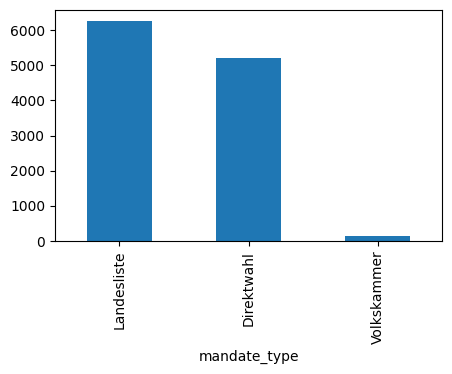

In [19]:
mdb_csv['mandate_type'].value_counts().plot(kind='bar', figsize=(5,3))

In [20]:
mdb_csv[mdb_csv['mandate_type'].isnull()]

,title,first_name,last_name,full_name,gender,date_birth,place_birth,country_birth,date_death,religion,family_stat,occupation,party,time,legislature,elect_distr,faction,mandate_type
5969,NaN,Werner,Kuhn,Werner Kuhn,männlich,19.05.1955,Zingst / Ostseebad,NaN,NaN,katholisch,"verheiratet, 3 Kinder",Dipl.-Ingenieur für Schiffstechnik,CDU,2,14,NaN,Fraktion der Christlich Demokratischen Union/C...,NaN


The value for the `mandate_type` can't be filled in Werner Kuhn's case for the election period 14. <br>
According to Wikipedia, he joined the Bundestag in the middle of the election period (August 2001) to fill the spot that Paul Krüger left vacant. <br>
Since Paul Krüger was elected via the Landesliste, this value will be used as the most representive for Werner Kuhn.

#### Missing values for country_birth

In [21]:
mdb_csv['country_birth'].value_counts() # no germany

country_birth
Österreich                             33
Türkei                                 15
Schweiz                                12
Niederlande                            11
CSFR                                   11
CSSR                                   11
Italien                                 9
Polen                                   9
USA                                     9
Frankreich                              8
Estland                                 7
Australien                              7
Ungarn                                  5
ehem. Deutsch-Ost-Afrika                5
Tschechoslowakei                        5
Ceylon                                  5
Jugoslawien                             5
Kroatien                                4
Oberösterreich                          4
Iran                                    4
Südwestafrika                           3
Tansania                                3
Rumänien                                3
Tansania (ehem. Deut

In [22]:
mdb_csv[mdb_csv['country_birth'].isnull()]

,title,first_name,last_name,full_name,gender,date_birth,place_birth,country_birth,date_death,religion,family_stat,occupation,party,time,legislature,elect_distr,faction,mandate_type
0,Dr.,Manfred,Abelein,Dr. Manfred Abelein,männlich,20.10.1930,Stuttgart,NaN,17.01.2008,katholisch,keine Angaben,"Rechtsanwalt, Wirtschaftsprüfer, Universitätsp...",CDU,1,5,174.0,Fraktion der Christlich Demokratischen Union/C...,Direktwahl
1,Dr.,Ernst,Achenbach,Dr. Ernst Achenbach,männlich,09.04.1909,Siegen,NaN,02.12.1991,evangelisch,"verheiratet, 3 Kinder",Rechtsanwalt und Notar,FDP,1,3,NaN,Fraktion der Freien Demokratischen Partei,Landesliste
3,Dr.,Else,Ackermann,Dr. Else Ackermann,weiblich,06.11.1933,Berlin,NaN,14.09.2019,evangelisch,ledig,Ärztin,CDU,1,11,NaN,Fraktion der Christlich Demokratischen Union/C...,Volkskammer
4,NaN,Ulrich,Adam,Ulrich Adam,männlich,09.06.1950,"Teterow, Kr. Teterow, Bezirk Neubrandenburg",NaN,NaN,evangelisch,"verheiratet, 2 Kinder","Mathematiker, Geschäftsführer",CDU,1,12,268.0,Fraktion der Christlich Demokratischen Union/C...,Direktwahl
5,NaN,Rudolf,Adams,Rudolf Adams,männlich,10.11.1919,Masburg / Kreis Cochem,NaN,25.05.2013,evangelisch,"verheiratet, 2 Kinder",Gewerkschaftssekretär,SPD,1,5,NaN,Fraktion der Sozialdemokratischen Partei Deuts...,Landesliste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11613,Dr.,Heinz,Riesenhuber,Dr. Heinz Riesenhuber,männlich,01.12.1935,Frankfurt/Main,NaN,NaN,katholisch,"verheiratet, 4 Kinder","Dipl.-Chemiker, Bundesminister a. D.",CDU,11,18,181.0,Fraktion der Christlich Demokratischen Union/C...,Direktwahl
11614,Dr.,Wolfgang,Schäuble,Dr. Wolfgang Schäuble,männlich,18.09.1942,Freiburg,NaN,NaN,evangelisch,"verheiratet, 4 Kinder","Bundestagspräsident, Bundesminister a. D., Jurist",CDU,11,17,284.0,Fraktion der Christlich Demokratischen Union/C...,Direktwahl
11615,NaN,Richard,Stücklen,Richard Stücklen,männlich,20.08.1916,Heideck,NaN,02.05.2002,katholisch,verheiratet,"Präsident DBT a. D., Vizepräsident DBT a. D., ...",CSU,11,11,232.0,Fraktion der Christlich Demokratischen Union/C...,Direktwahl
11616,Dr.,Wolfgang,Schäuble,Dr. Wolfgang Schäuble,männlich,18.09.1942,Freiburg,NaN,NaN,evangelisch,"verheiratet, 4 Kinder","Bundestagspräsident, Bundesminister a. D., Jurist",CDU,12,18,284.0,Fraktion der Christlich Demokratischen Union/C...,Direktwahl


There is no birth country value for Germany, which means all null values can be replaced with `Germany`.

#### Missing values for religion and family_stat

In [23]:
mdb_csv['religion'].value_counts() # keine Angaben as possible value

religion
evangelisch                  3405
ohne Angaben                 3274
katholisch                   2984
römisch-katholisch            828
evangelisch-lutherisch        366
konfessionslos                233
evangelisch-reformiert         34
Atheistin                      12
Islam                           9
religionslos                    9
evangelisch-freikirchlich       9
freireligiös                    8
muslimisch                      7
Atheist                         6
neuapostolisch                  1
protestantisch                  1
humanistisch                    1
griechisch-orthodox             1
alevitisch                      1
alt-katholisch                  1
orthodox                        1
russisch-orthodox               1
Name: count, dtype: int64

There are multiple values that not distinct in their semantic.

Values like `Atheistin`, `Atheist` and `religionslos` have the same meaning. 
The same can be said about `Islam` and `muslimisch`.<br>

Smaller different Christian confessions also can be grouped together with their larger cousins. 

    Evangelisch: 3815
    Katholisch: 3813
    Konfessionslos/Atheistisch/Humanistisch: 261
    Ohne Angaben: 3274
    Islamisch/Muslimisch: 17
    Orthodox: 3
    Andere: 9

Detailed listing of all religions/confessions:

    Evangelisch: 3815
        evangelisch: 3405
        evangelisch-lutherisch: 366
        evangelisch-reformiert: 34
        evangelisch-freikirchlich: 9
        protestantisch: 1

    Katholisch: 3813
        katholisch: 2984
        römisch-katholisch: 828
        alt-katholisch: 1

    Konfessionslos/Atheistisch/Humanistisch: 261
        konfessionslos: 233
        Atheistin: 12
        Atheist: 6
        humanistisch: 1
        religionslos: 9

    Ohne Angaben: 3274
        ohne Angaben: 3274

    Islamisch/Muslimisch: 17
        Islam: 9
        muslimisch: 7
        alevitisch: 1

    Orthodox: 3
        griechisch-orthodox: 1
        russisch-orthodox: 1
        orthodox: 1

    Andere: 9
        neuapostolisch: 1
        freireligiös: 8

In [24]:
print('Amount of unique family_stat values:', len(mdb_csv['family_stat'].unique()))

Amount of unique family_stat values: 60


In [25]:
mdb_csv['family_stat'].value_counts() # no real value because of combination between relationship type and amount of children

family_stat
verheiratet, 2 Kinder                            2720
verheiratet, 3 Kinder                            1821
verheiratet                                      1717
verheiratet, 1 Kind                              1365
keine Angaben                                    1043
verheiratet, 4 Kinder                             887
ledig                                             425
verheiratet, 5 Kinder                             329
verheiratet, 6 Kinder                             178
2 Kinder                                          113
verwitwet, 2 Kinder                                77
1 Kind                                             76
geschieden, 2 Kinder                               71
geschieden, 1 Kind                                 69
verwitwet                                          63
ledig, 1 Kind                                      50
3 Kinder                                           50
geschieden, 3 Kinder                               38
verwitwet, 1 Kin

The values of the `family_stat` are not normalized instead it tries to combine civil status with the number of children. <br>
These values have to be split to make more sense of the data.

Additionally should the civil status be simplified. <br>
According to the Personalstandsregister do multiple values like `verlobt`, `patchwork` or `verpartnert`not exist.
It mainly only acceptst the values for single, married, divorced and widowed (and their according values for a civil partnership). 

Since the civil partnership does no longer exist in Germany, the values involving a civil partnership of any kind will should be transformed to their according civil status.

### y-values for party and faction

In [26]:
mdb_csv['party'].value_counts() 

party
SPD                      4247
CDU                      4150
FDP                      1035
CSU                       997
BÜNDNIS 90/DIE GRÜNEN     451
DIE LINKE.                296
AfD                        91
PDS                        77
GRÜNE                      51
DP                         37
Plos                       34
DIE GRÜNEN/BÜNDNIS 90      32
FU                         21
GB/ BHE                    20
KPD                        18
PDS/LL                     15
WAV                        14
DZP                         5
BP                          5
DSU                         5
CSUS                        4
DRP                         3
DPS                         2
DPB                         1
CVP                         1
SRP                         1
Name: count, dtype: int64

<Axes: xlabel='party'>

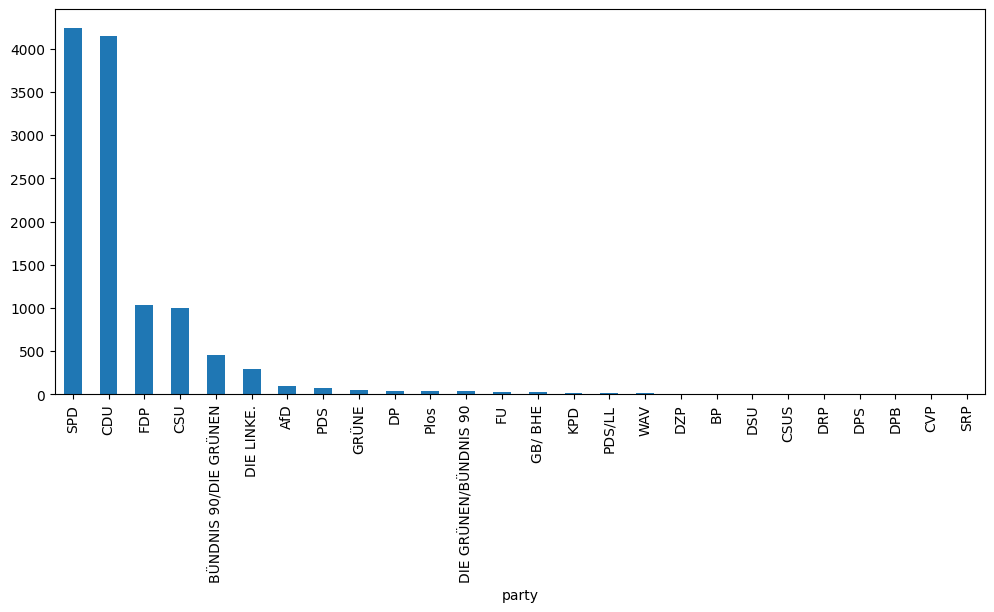

In [27]:
mdb_csv['party'].value_counts().plot(kind='bar', figsize=(12,5))

In [28]:
mdb_csv['faction'].value_counts()

faction
Fraktion der Christlich Demokratischen Union/Christlich - Sozialen Union          5089
Fraktion der Sozialdemokratischen Partei Deutschlands                             4244
Fraktion der Freien Demokratischen Partei                                         1052
Fraktion Bündnis 90/Die Grünen                                                     419
Fraktion DIE LINKE.                                                                269
Fraktion Die Grünen                                                                103
Alternative für Deutschland                                                         92
Gruppe der Partei des Demokratischen Sozialismus                                    55
Fraktion Deutsche Partei                                                            49
Fraktionslos                                                                        39
Fraktion der Partei des Demokratischen Sozialismus                                  39
Fraktion Gesamtdeutscher Block / Bl

<Axes: xlabel='faction'>

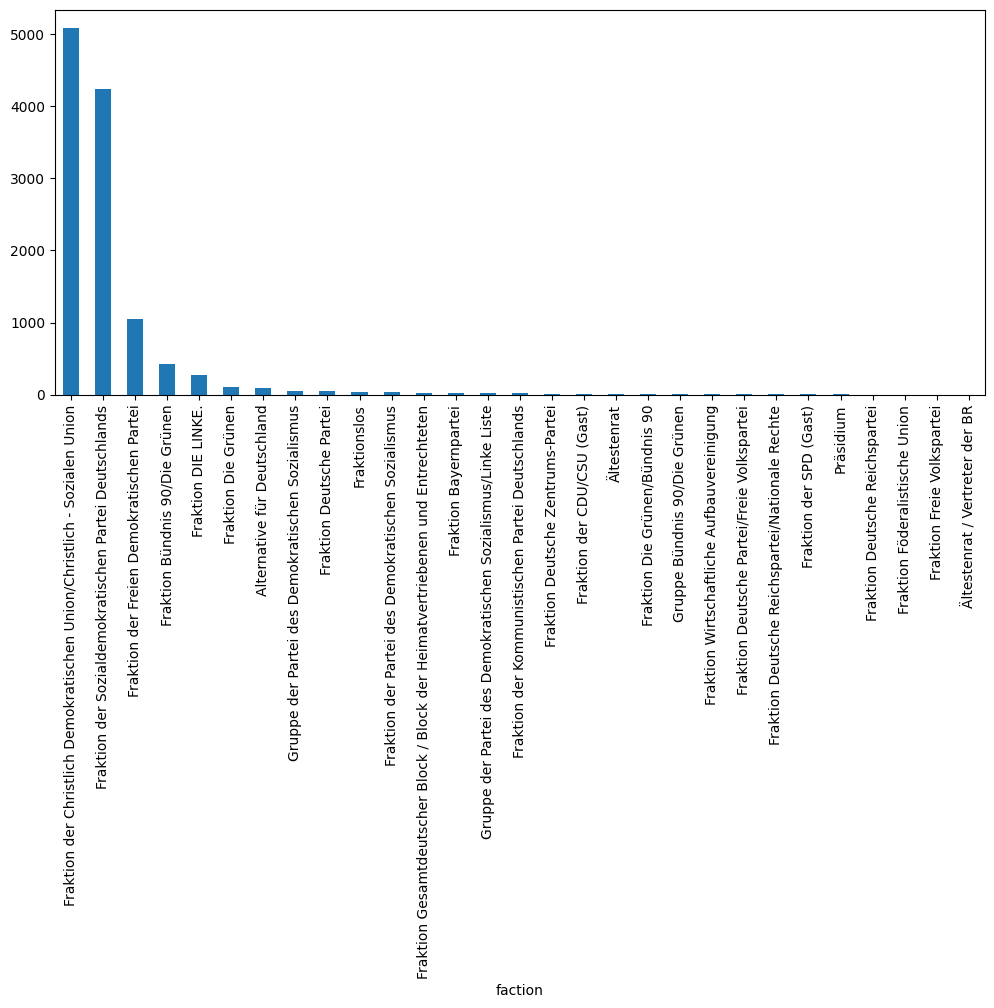

In [29]:
mdb_csv['faction'].value_counts().plot(kind='bar', figsize=(12,5))

Since for the `party` and `faction` value there are a lot of outliers, which will be difficult if not impossible to predict, the politial senitment of parties can be grouped closer together.

TODO:

TODO: How do interpret the election district???? --> has the election district correlation to party or faction --> also try color plot party/faction/spectrum values in different color according to the election district

legislature
19    729
11    702
12    699
14    699
13    693
18    658
17    652
16    642
15    628
4     580
10    576
3     562
5     559
2     558
6     556
8     553
9     549
7     549
1     474
Name: count, dtype: int64

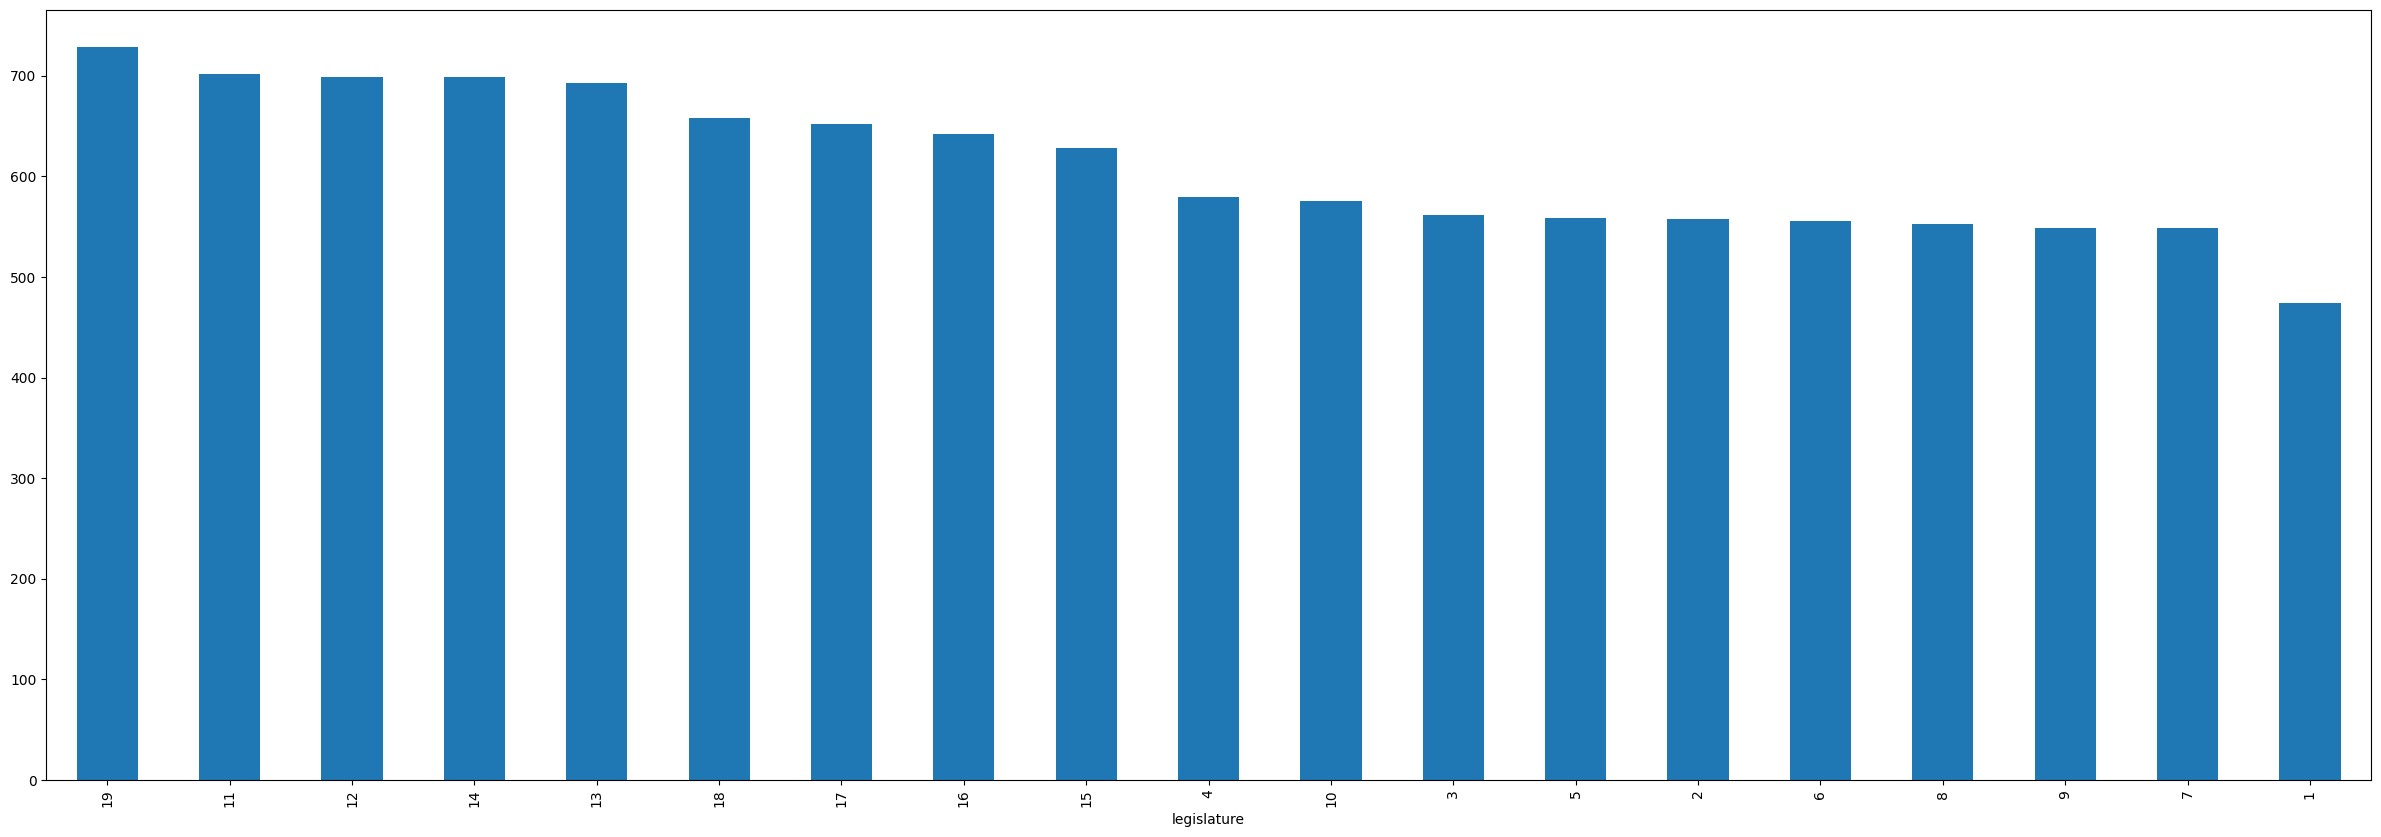

In [30]:
mdb_csv['legislature'].value_counts().plot(kind='bar', figsize=(30,10))
mdb_csv['legislature'].value_counts()

### 2.3) numeric values

In [31]:
mdb_csv.describe()

,time,legislature,elect_distr
count,11618.000000,11618.000000,5970.000000
mean,2.571355,10.507058,134.130151
std,1.707634,5.433358,86.298410
min,1.000000,1.000000,1.000000
25%,1.000000,6.000000,56.000000
50%,2.000000,11.000000,130.000000
75%,3.000000,15.000000,204.000000
max,13.000000,19.000000,328.000000


array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'legislature'}>],
       [<Axes: title={'center': 'elect_distr'}>, <Axes: >]], dtype=object)

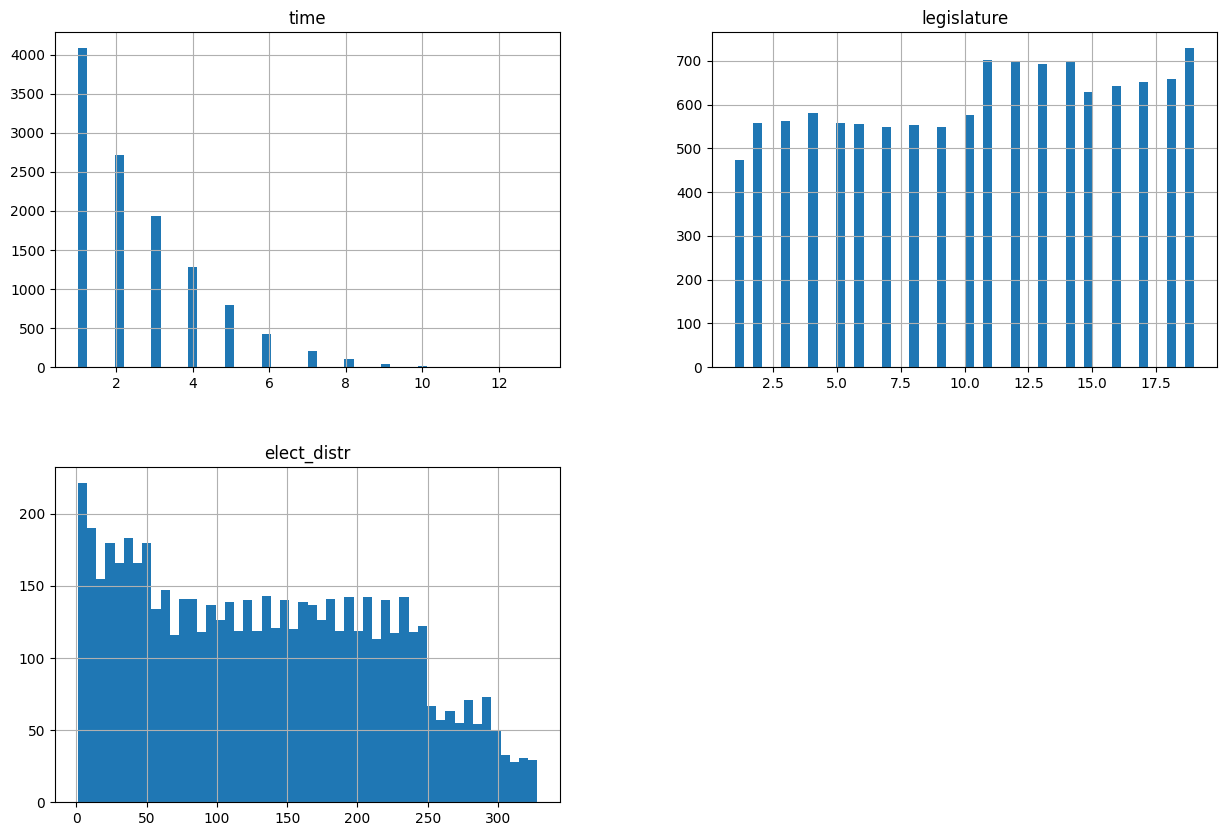

In [32]:
mdb_csv.hist(bins=50, figsize=(15,10))

There are no numeric outlier values.

The histogram to `elect_distr` is not really relevant since it represents the geographic value of the election district.

<hr>

## 3) Data Preprocessing
 geographic data in numeric data
https://thepythoncode.com/article/get-geolocation-in-python

### 3.1) Missing values
The missing values for `place_birth`, `party` and `mandate_type`are filled like described in 2.2)

In [33]:
mdb_csv.at[3357, 'place_birth'] = 'Sondershausen'
mdb_csv.at[6500, 'place_birth'] = 'Sondershausen'
mdb_csv.at[3564, 'place_birth'] = 'Nordhausen'
mdb_csv.at[6650, 'place_birth'] = 'Nordhausen'

mdb_csv.at[128, 'place_birth'] = 'Leipzig'
mdb_csv.at[225, 'place_birth'] = 'Wittenberge'
mdb_csv.at[632, 'place_birth'] = 'Rostock'
mdb_csv.at[748, 'place_birth'] = 'Cottbus'
mdb_csv.at[811, 'place_birth'] = 'Gera'
mdb_csv.at[855, 'place_birth'] = 'Dresden'
mdb_csv.at[1079, 'place_birth'] = 'Saalfeld'
mdb_csv.at[1269, 'place_birth'] = 'Meißen'
mdb_csv.at[1520, 'place_birth'] = 'Köthen'
mdb_csv.at[1540, 'place_birth'] = 'Hamburg'
mdb_csv.at[1892, 'place_birth'] = 'Bad Neuenahr'
mdb_csv.at[2014, 'place_birth'] = 'Schwarzheide'
mdb_csv.at[2090, 'place_birth'] = 'Gersdorf'
mdb_csv.at[2334, 'place_birth'] = 'Berg'
mdb_csv.at[2711, 'place_birth'] = 'Grabs'
mdb_csv.at[5991, 'place_birth'] = 'Grabs'

mdb_csv.at[574, 'party'] = 'SPD'
mdb_csv.at[4481, 'party'] = 'SPD'
mdb_csv.at[1322, 'party'] = 'NDP'
mdb_csv.at[2054, 'party'] = 'DP'
mdb_csv.at[5510, 'party'] = 'DP'

mdb_csv.at[5969, 'mandate_type'] = 'Landesliste'

### 3.2) Geographic data
Treating the geographic data from `place_birth`, `birth_country` and `elect_distr` like categorical or numeric data would be wrong. <br>
These places are in relation to each other, which can each be represented as coordinates with latitude and longitude, so that the computer understands this numeric relation.

To determine the latitude and longitude the package `geopy` is used.
This package only needs a name to determine a location. <br>
Because of that the country column can be dropped.

### 3.3) Categorical data
Some categorical data represents the identical or near identical values.
While many values can be transformed after the train-test split, `party` and `faction` have to be cleaned up now. 

#### religion

#### party

### 3.4) Date data
Is happening in the pipeline

### 3.5) Remove columns

In [34]:
mdb_csv.info()
mdb_csv = mdb_csv.drop(columns=["first_name", "last_name", "full_name", "date_death", "occupation", "country_birth"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11618 entries, 0 to 11617
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          3061 non-null   object 
 1   first_name     11618 non-null  object 
 2   last_name      11618 non-null  object 
 3   full_name      11618 non-null  object 
 4   gender         11618 non-null  object 
 5   date_birth     11618 non-null  object 
 6   place_birth    11618 non-null  object 
 7   country_birth  213 non-null    object 
 8   date_death     5411 non-null   object 
 9   religion       11192 non-null  object 
 10  family_stat    11463 non-null  object 
 11  occupation     11618 non-null  object 
 12  party          11618 non-null  object 
 13  time           11618 non-null  int64  
 14  legislature    11618 non-null  int64  
 15  elect_distr    5970 non-null   float64
 16  faction        11618 non-null  object 
 17  mandate_type   11618 non-null  object 
dtypes: flo

<hr>

## 3) Train-Test-Split

In [35]:
from sklearn.model_selection import train_test_split

X_mdb = mdb_csv.drop(columns=['party', "faction"], axis=1)
y_mdb = mdb_csv[['party', 'faction']]

X_train, X_test, y_train, y_test = train_test_split(mdb_csv, y_mdb, test_size=0.2, random_state=42)

<hr>

## 4) Correlation between different attributes and the result attribute

In [36]:
X_comb = pd.concat([X_train, y_train], axis=1)
corr_matrix = X_comb.corr(numeric_only=True)
corr_matrix[y_train]#.sort_values(ascending=False)

,time,legislature,elect_distr
time,NaN,NaN,NaN
legislature,NaN,NaN,NaN
elect_distr,NaN,NaN,NaN


## 5) Transform Data 
Fill missing numerical values, scale numerical values and transform categories in machine readable values via encoders

### 5.1) Custom Transformer

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

#### religion

In [38]:
class ReligionTransformer(BaseEstimator, TransformerMixin):
    """
    A transformer class that is used to normalize the relion categories by grouping them together.

    """
    def __init__(self) -> None:
        # No parameters to initialize for this transformer
        pass

    def fit(self, X, y=None):
        # No fitting necessary for this transformer
        return self
    
    def transform(self, X):
        X_ = X.copy()
        # Apply the transformation
        for col in X_.columns:
            X_[col] = X_[col].apply(self._replace_strings)
        return X_
    
    def _replace_strings(self, value):
        # Check if the value is a string and perform replacement
        if isinstance(value, str):
            if value == 'evangelisch-lutherisch' or value == 'evangelisch-reformiert' or value == 'evangelisch-freikirchlich' or value == "protestantisch":
                return 'evangelisch'
            elif value == 'römisch-katholisch' or value == 'alt-katholisch':
                return 'katholisch'
            elif value == 'konfessionslos' or value == 'Atheistin' or value == 'Atheist' or value == 'humanistisch' or value == 'religionslos':
                return "konfessionslos/atheistisch/humanistisch"
            elif value == 'Islam' or value == 'muslimisch' or value == 'alevitisch':
                return 'islamisch'
            elif value == 'griechisch-orthodox' or value == 'russisch-orthodox':
                return 'orthodox'
            elif value == 'neuapostolisch' or value == 'freireligös':
                return 'andere'
        # Return "ohne Angaben" in case the value is not a string   
        else: 
            return "ohne Angaben"
        
        return value

#### title

In [39]:
class TitleTransformer(BaseEstimator, TransformerMixin):
    """
    A transformer class that is used to normalize the party category.

    """
    def __init__(self) -> None:
        # No parameters to initialize for this transformer
        pass

    def fit(self, X, y=None):
        # No fitting necessary for this transformer
        return self
    
    def transform(self, X):
        X_ = X.copy()
        # Apply the transformation
        for col in X_.columns:
            X_[col] = X_[col].apply(self._replace_strings)
        return X_
    
    def _replace_strings(self, value):
        if isinstance(value, str):
            return "Dr."

#### party

In [40]:
class PartyTransformer(BaseEstimator, TransformerMixin):
    """
    A transformer class that is used to normalize the party category.

    """
    def __init__(self) -> None:
        # No parameters to initialize for this transformer
        pass

    def fit(self, X, y=None):
        # No fitting necessary for this transformer
        return self
    
    def transform(self, X):
        X_ = X.copy()
        # Apply the transformation
        for col in X_.columns:
            X_[col] = X_[col].apply(self._replace_strings)
        return X_
    
    def _replace_strings(self, value):
        ## TODO:             
        return value

#### faction

In [41]:
class FactionTransformer(BaseEstimator, TransformerMixin):
    """
    A transformer class that is used to normalize the faction category.

    """
    def __init__(self) -> None:
        # No parameters to initialize for this transformer
        pass

    def fit(self, X, y=None):
        # No fitting necessary for this transformer
        return self
    
    def transform(self, X):
        X_ = X.copy()
        # Apply the transformation
        for col in X_.columns:
            X_[col] = X_[col].apply(self._replace_strings)
        return X_
    
    def _replace_strings(self, value):
        ## TODO:             
        return value

#### date

In [42]:
from datetime import datetime, timezone

class DateTransformer(BaseEstimator, TransformerMixin):
    """
    A transformer class that is used to normalize the party category.

    """
    def __init__(self) -> None:
        # No parameters to initialize for this transformer
        pass

    def fit(self, X, y=None):
        # No fitting necessary for this transformer
        return self
    
    def transform(self, X):
        X_ = X.copy()
        # Apply the transformation
        for col in X_.columns:
            X_[col] = X_[col].apply(self._date_to_num)
        return X_
    
    def _date_to_num(self, value):
        return datetime.strptime(value, '%d.%m.%Y').replace(tzinfo=timezone.utc).timestamp()

#### geo

In [204]:
from geopy.geocoders import Nominatim
import re

class GeoTransformer(BaseEstimator, TransformerMixin):
    """
    A transformer class that is used to normalize a location name to coordinates.

    """
    def __init__(self, column_name) -> None:
        self.column_name = column_name
        self.app = Nominatim(user_agent="bundestag_ml")        

    def fit(self, X, y=None):
        # No fitting necessary for this transformer
        return self
    
    def transform(self, X):
        X_ = X.copy()
        
        # New columns
        X_[self.column_name + '_lat'] = np.nan
        X_[self.column_name + '_lon'] = np.nan
            
        coordinates = X_[self.column_name ].apply(self._coordinates)
        
        for index, row in X_.iterrows():
            print(coordinates[index])
            lat, lon = coordinates[index]
            X_.at[index, self.column_name + '_lat'] = lat
            X_.at[index, self.column_name + '_lon'] = lon

        X_ = X_.drop(self.column_name, axis=1)
        return X_
    
    def _coordinates(self, value):        
        splitted = [segment.strip() for segment in re.split(r'[,/]', value)]
        x = self.app.geocode(splitted[0]).raw  
          
        return float(x['lat']), float(x['lon'])

class PlaceTransformer(BaseEstimator, TransformerMixin):
    """
    A transformer class that is used to transform the location names to findable cities by geopy.

    """
    def __init__(self) -> None:
        self.place_fix = pd.read_csv("D:/Dev/python/bundestag-member-ML/data/place_fix.csv", sep=';')
        

    def fit(self, X, y=None):
        # No fitting necessary for this transformer
        return self
    
    def transform(self, X):
        X_ = X.copy()
        
        # Apply the place fixes
        for index, row in self.place_fix.iterrows():
            old, new = row
            X_['place_birth'] = X_['place_birth'].replace(to_replace=old, value=new)
        
        return X_
    

class ElectDistrTransformer(BaseEstimator, TransformerMixin):
    """
    A transformer class that is used to transform the number of the election distric to a geographic location.

    """
    def __init__(self) -> None:
        self.place_fix = pd.read_csv("D:/Dev/python/bundestag-member-ML/data/elect_dist_map.csv", sep=';')
        

    def fit(self, X, y=None):
        # No fitting necessary for this transformer
        return self
    
    def transform(self, X):
        X_ = X.copy()
        
        # Apply the elect_distr mapping
        for index, row in self.place_fix.iterrows():
            elect_dist, legislature, value = row
            X_[X_['legislature']==legislature]['elect_distr'].replace(to_replace=elect_dist, value=value, inplace=True)
        
        return X_
      

#### family_stat

### 5.2) Pipelines

In [172]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

In [205]:
# General Pipes
num_pipeline = Pipeline(steps=[
    ('std_scaler', StandardScaler()),
])

cat_ord_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

cat_1hot_pipeline = Pipeline(steps=[
    ('1hot', OneHotEncoder()),
])

# Custom Transfromer Pipes
title_pipeline = Pipeline(steps=[
    ('title_transformer', TitleTransformer()),
    ('imputer', SimpleImputer(strategy='constant', fill_value='keine Angabe')),
    ('ordinal', OrdinalEncoder()) 
])

religion_pipline = Pipeline(steps=[
    ('religion_transformer', ReligionTransformer()),
    ('1hot', OneHotEncoder()),
])

date_pipeline = Pipeline(steps=[
    ('date_transformer', DateTransformer()),
    ('std_scaler', StandardScaler()),
])

place_pipeline = Pipeline(steps=[
    ('place_transformer', PlaceTransformer()),
    ('geo_transformer', GeoTransformer(column_name='place_birth')),
])

elect_distr_pipeline = Pipeline(steps=[
    ('elect_distr_transformer', ElectDistrTransformer()),
    ('imputer', SimpleImputer(strategy='constant', fill_value='Vogtei')),    # Vogtei is the middle of Germany
    ('geo_transformer', GeoTransformer(column_name='elect_distr')),
])

In [206]:
from sklearn.compose import ColumnTransformer

num_attributes = ['time', 'legislature']
cat_ord_attributes = ['gender']
cat_1hot_attributes = ['mandate_type']

title_attributes = ['title']
religion_attributes = ['religion']
date_attributes = ['date_birth']
place_attributes = ['place_birth']
elect_distr_attributes = ['elect_dist']

coordinate_attributes = ['place_birth_lat', 'place_birth_lon', 'elect_distr_lat', 'elect_distr_lon']


full_pipeline = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_attributes),
    ("cat_ord", cat_ord_pipeline, cat_ord_attributes),
    ("cat_1hot", cat_1hot_pipeline, cat_1hot_attributes),
    
    ("title", title_pipeline, title_attributes),
    ("religon", religion_pipline, religion_attributes),
    ("date", date_pipeline, date_attributes),
    ("place_birth", place_pipeline, place_attributes),
    ("elect_distr", elect_distr_pipeline, elect_distr_attributes),
    ("coordinates", num_pipeline, coordinate_attributes),
    # ("family_stat", family_stat_pipeline, ['family_pipeline']),
    
    # ("party", party_pipeline, ['party']),
    # ("faction", faction_pipeline, ['faction']),
])

In [201]:
mdb_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11618 entries, 0 to 11617
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         3061 non-null   object 
 1   gender        11618 non-null  object 
 2   date_birth    11618 non-null  object 
 3   place_birth   11618 non-null  object 
 4   religion      11192 non-null  object 
 5   family_stat   11463 non-null  object 
 6   party         11618 non-null  object 
 7   time          11618 non-null  int64  
 8   legislature   11618 non-null  int64  
 9   elect_distr   5970 non-null   float64
 10  faction       11618 non-null  object 
 11  mandate_type  11618 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.1+ MB


In [208]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [ ]:
mdb_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11618 entries, 0 to 11617
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         3061 non-null   object 
 1   gender        11618 non-null  object 
 2   date_birth    11618 non-null  object 
 3   place_birth   11618 non-null  object 
 4   religion      11192 non-null  object 
 5   family_stat   11463 non-null  object 
 6   party         11618 non-null  object 
 7   time          11618 non-null  int64  
 8   legislature   11618 non-null  int64  
 9   elect_distr   5970 non-null   float64
 10  faction       11618 non-null  object 
 11  mandate_type  11618 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.1+ MB


In [207]:
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame({
    'id': [1,2,3],
    'place_birth': ['New York, USA', 'Berlin, Germany', 'Paris, France']
})

# Initialize GeoTransformer
geo_transformer = GeoTransformer(column_name='place_birth')
scaler = StandardScaler()

# Test transform on a sample DataFrame
transformed_df = geo_transformer.transform(df)
transformed_df = scaler.fit_transform(transformed_df)


print("Transformed DataFrame:")
print(type(transformed_df))

ct = ColumnTransformer([
    
    ("place_birth", place_pipeline, place_attributes),
])
test = ct.fit_transform(df)
print(test)

(40.7127281, -74.0060152)
(52.5170365, 13.3888599)
(48.8534951, 2.3483915)
Transformed DataFrame:
<class 'numpy.ndarray'>
(40.7127281, -74.0060152)
(52.5170365, 13.3888599)
(48.8534951, 2.3483915)
[[ 40.7127281 -74.0060152]
 [ 52.5170365  13.3888599]
 [ 48.8534951   2.3483915]]


In [ ]:
cat_attibs_2_names = full_pipeline.named_transformers_['cat2']['1hot'].get_feature_names_out(cat_attribs_2)

all_attribs_names = num_attributes + date_attributes + geo_attributes + cat_ord_attributes # TODO: 
X_train_prepared = pd.DataFrame(X_train_prepared, columns=all_attribs_names)

KeyError: 'cat2'

## 6) Regression

: 

## 7) Classifier

: 

## 8) Validation
Check the accuracy_score, the confusion_matrix, n-fold cross validation or similar methods

: 

## 9) Fine Tuning

: 

## 10) Evaluation

: 